In [39]:
'''
# Input


# Input

1. wide data(date index 포함해야 함)
2. map data involves columns ticker, index

---
# Feature Extraction

map index에 따라
minus -> differ function
change -> returner function
else -> 그대로 

---
# ACF
acf_fal function
(cubic spline -> ffill -> bfill 고정 적용)

---
'''  

'\n# Input\n\n\n# Input\n\n1. wide data(date index 포함해야 함)\n2. map data involves columns ticker, index\n\n---\n# Feature Extraction\n\nmap index에 따라\nminus -> differ function\nchange -> returner function\nelse -> 그대로 \n\n---\n# ACF\nacf_fal function\n(cubic spline -> ffill -> bfill 고정 적용)\n\n---\n'

In [75]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import re
%matplotlib inline

In [76]:
newdf = pd.read_csv('semiconductor_bloomberg_raw_20200109.csv', index_col = 0)

In [78]:
# 아직 남아 있는 특수 문자와, 숫자가 아닌 것 제거
for i in newdf.columns:
    if i == 'date':
        pass
    else:
        newdf[i] = newdf[i].map(lambda x: re.sub("\D", "", str(x)))
        newdf[i] = pd.to_numeric(newdf[i])


In [79]:
newdf.head()

,date,GDPCQOQIndex,GDPCYOYIndex,GDPCTOT%Index,GPDITOC%Index,GPGSTOC%Index,RGCDCIPIIndex,GDPCUR$Index,GDPCURYIndex,GDPPIQQIndex,...,KOMSLYIndex,KOMSM1FYIndex,KOFETOTIndex,KOFETOT%Index,KORP7DIndex,KOCICOBAIndex,KOCICONFIndex,KRBO3MIndex,KWCDCCurncy,GVSK10YRIndex
0,1981-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1981-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1981-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1981-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1981-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [80]:
len(newdf.columns)

291

In [81]:
mmdf = pd.read_csv('bloomberg_map_index.csv')

In [82]:
mmdf.head()

,ticker,index
0,SPXIndex,change
1,CCMPIndex,change
2,NKYIndex,change
3,CINDIndex,change
4,IXKIndex,change


In [83]:
# date time으로 변경이 안되어 있었다 .
newdf['date'] = pd.to_datetime(newdf['date'])

In [84]:
newdf.set_index('date', inplace = True)

In [85]:
newdf.head()

,GDPCQOQIndex,GDPCYOYIndex,GDPCTOT%Index,GPDITOC%Index,GPGSTOC%Index,RGCDCIPIIndex,GDPCUR$Index,GDPCURYIndex,GDPPIQQIndex,GDPCPCECIndex,...,KOMSLYIndex,KOMSM1FYIndex,KOFETOTIndex,KOFETOT%Index,KORP7DIndex,KOCICOBAIndex,KOCICONFIndex,KRBO3MIndex,KWCDCCurncy,GVSK10YRIndex
date,,,,,,,,,,,,,,,,,,,,,
1981-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1981-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1981-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1981-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1981-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [95]:
# 제대로 Column 들이 박혀있는 Dataframe이 들어오는 클래스
class Builder:

    def __init__(self, input_df, map_df):
        self.df = input_df.interpolate(method = 'cubic', limit_area = 'inside').fillna(method = 'ffill').fillna(method = 'bfill')
        self.mdf = map_df
        self.lag_days = [1, 7, 30, 90, 180, 365] # lagging day variation


    def returner(self, target_column):      

        col_name =  []
        # creating new column name
        for i in self.lag_days:
            col_name.append(target_column + str(i))
        # appending lagged columns
        for i, j in enumerate(self.lag_days):
            self.df[locals()['col_name'][i]] = self.df[target_column] / self.df[target_column].shift(periods = j, axis = 0)

        return self.df
    
    def differ(self, target_column):
        col_name = []
        for i in self.lag_days:
            col_name.append(target_column + str(i))
        for i, j in enumerate(self.lag_days):
            self.df[locals()['col_name'][i]] = self.df[target_column] - self.df[target_column].shift(periods = j, axis = 0)
        return self.df
    
    
    def execution(self):
        for i, j in enumerate(self.mdf['ticker']): # 키 값들을 순차적으로 돌리면서 순회, 예외사항이 있는지? 아 else를 걸어두면 상관없겠구나. 딱 mdf에 있는 만큼만 반영될듯
            #if self.mdf.loc[i, :][0] in self.df.columns:
            if j in self.df.columns:

                if self.mdf.loc[i, :][1] == 'minus':
                    self.differ(j)

                elif self.mdf.loc[i, :][1] == 'change':
                    self.returner(j)

                else:
                    pass
            else:
                pass
            
        return self.df
            
    # 차분에 ACF 그래프도 그리면 좋을듯. 정상성을 나타내지 않는 시계열에서는 ACF가 느리게 감소하고
    # 정상성을 나타내는 시계열에서는 ACF가 비교적 빠르게 0으로 떨어질 것
    # 구글 주식 가격 데이터의 경우 차분을 하면 ACF는 단순히 white noise time series 처럼 생겼음

    def acf_cal(self, target):
        data = pd.DataFrame(self.df[target])
        # column 생성 후에는 nan값이 생기니까 보충 한번 더 해주고 그리기
        data = data.interpolate(method = 'cubic', limit_area = 'inside').fillna(method = 'ffill').fillna(method = 'bfill')
        acf = sm.tsa.acf(data)      
        plt.stem(acf)
        plt.show()



In [96]:
cla = Builder(newdf, mmdf)

In [97]:
cla.df.columns

Index(['GDPCQOQIndex', 'GDPCYOYIndex', 'GDPCTOT%Index', 'GPDITOC%Index',
       'GPGSTOC%Index', 'RGCDCIPIIndex', 'GDPCUR$Index', 'GDPCURYIndex',
       'GDPPIQQIndex', 'GDPCPCECIndex',
       ...
       'KOMSLYIndex', 'KOMSM1FYIndex', 'KOFETOTIndex', 'KOFETOT%Index',
       'KORP7DIndex', 'KOCICOBAIndex', 'KOCICONFIndex', 'KRBO3MIndex',
       'KWCDCCurncy', 'GVSK10YRIndex'],
      dtype='object', length=290)

In [98]:
cla.execution()

,GDPCQOQIndex,GDPCYOYIndex,GDPCTOT%Index,GPDITOC%Index,GPGSTOC%Index,RGCDCIPIIndex,GDPCUR$Index,GDPCURYIndex,GDPPIQQIndex,GDPCPCECIndex,...,KOFETOTIndex30,KOFETOTIndex90,KOFETOTIndex180,KOFETOTIndex365,KWCDCCurncy1,KWCDCCurncy7,KWCDCCurncy30,KWCDCCurncy90,KWCDCCurncy180,KWCDCCurncy365
date,,,,,,,,,,,,,,,,,,,,,
1981-01-01,81.0,16.0,13.0,425.0,55.0,1180.0,312421.0,120.0,110.0,92.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1981-01-02,81.0,16.0,13.0,425.0,55.0,1180.0,312421.0,120.0,110.0,92.0,...,NaN,NaN,NaN,NaN,0.00000,NaN,NaN,NaN,NaN,NaN
1981-01-05,81.0,16.0,13.0,425.0,55.0,1180.0,312421.0,120.0,110.0,92.0,...,NaN,NaN,NaN,NaN,0.00000,NaN,NaN,NaN,NaN,NaN
1981-01-06,81.0,16.0,13.0,425.0,55.0,1180.0,312421.0,120.0,110.0,92.0,...,NaN,NaN,NaN,NaN,0.00000,NaN,NaN,NaN,NaN,NaN
1981-01-07,81.0,16.0,13.0,425.0,55.0,1180.0,312421.0,120.0,110.0,92.0,...,NaN,NaN,NaN,NaN,0.00000,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-10-27,19.0,20.0,29.0,15.0,20.0,690.0,2152582.0,37.0,17.0,22.0,...,350.416052,259.624632,79.850647,-2829.945890,4.92157,5.921570,-13.007313,-36.07843,122.92157,-23.07843
2019-10-28,19.0,20.0,29.0,15.0,20.0,690.0,2152582.0,37.0,17.0,22.0,...,348.853251,266.851623,88.351361,-1794.559982,2.07843,8.393021,-11.000000,-34.00000,-45.00000,-21.00000
2019-10-29,19.0,20.0,29.0,15.0,20.0,690.0,2152582.0,37.0,17.0,22.0,...,346.708058,274.033094,96.735092,-680.394663,0.00000,8.000000,-11.000000,-29.00000,-43.00000,-21.00000


In [99]:
len(cla.df.columns)

986

/Users/mokpolar/opt/anaconda3/envs/tf-py36/lib/python3.6/site-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)
/Users/mokpolar/opt/anaconda3/envs/tf-py36/lib/python3.6/site-packages/ipykernel_launcher.py:57: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


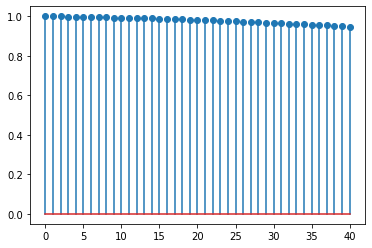

In [100]:
cla.acf_cal('GDPCURYIndex')

/Users/mokpolar/opt/anaconda3/envs/tf-py36/lib/python3.6/site-packages/ipykernel_launcher.py:57: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


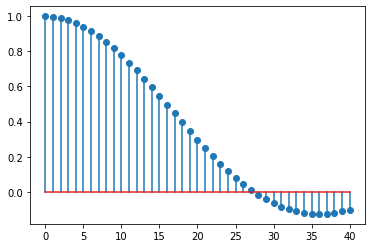

In [101]:
cla.acf_cal('KOFETOTIndex90')
# acf_cal 을 했을 때 값이 안나오는 이유는 Nan이 있기 때문이다. 

In [94]:
cla.df['KOFETOTIndex90']

date
1981-01-01           NaN
1981-01-02           NaN
1981-01-05           NaN
1981-01-06           NaN
1981-01-07           NaN
                 ...    
2019-10-27    259.624632
2019-10-28    266.851623
2019-10-29    274.033094
2019-10-30    281.156276
2019-10-31    288.208403
Name: KOFETOTIndex90, Length: 11682, dtype: float64